# Alucar - Análise de Vendas

In [52]:
import pandas as pd

In [53]:
alucar = pd.read_csv('data/alucar.csv')

In [54]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [55]:
print(f'{alucar.shape[0]} linhas e {alucar.shape[1]} colunas.')

24 linhas e 2 colunas.


In [56]:
print('Dados nulos: ', alucar.isna().sum().sum())

Dados nulos:  0


In [57]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [58]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [59]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [60]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='mes', ylabel='vendas'>

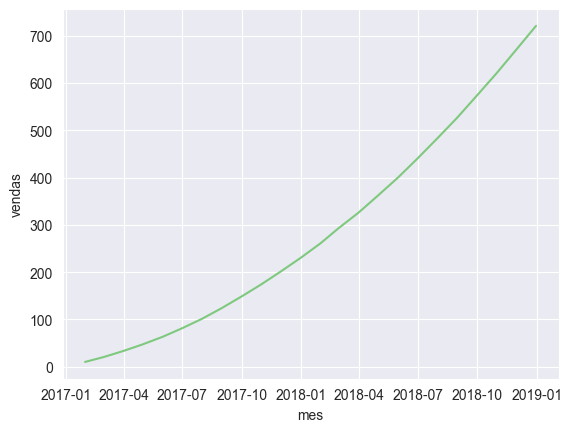

In [61]:
sns.lineplot(alucar, x='mes', y='vendas')

In [62]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

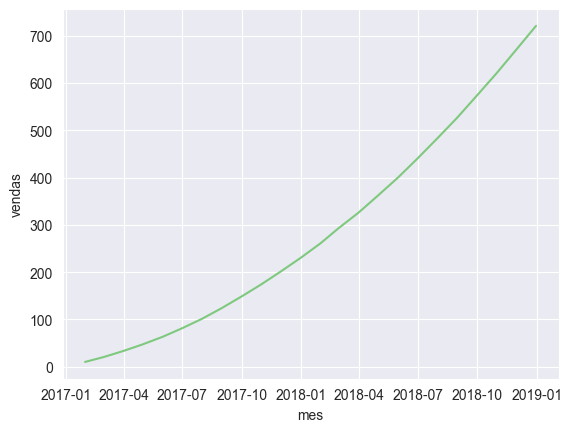

In [63]:
alucar_aumento = sns.lineplot(alucar, x='mes', y='vendas')

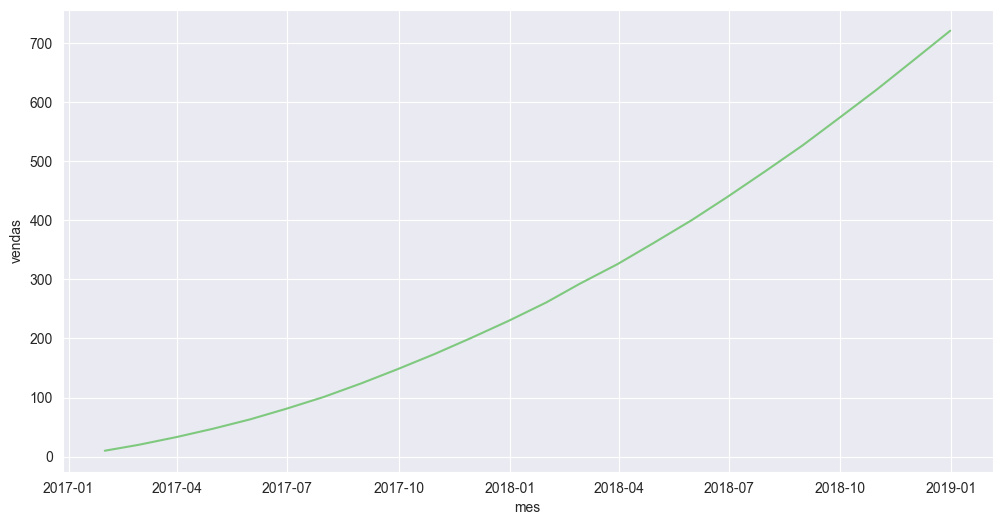

In [64]:
alucar_aumento.figure.set_size_inches(12,6)
alucar_aumento.figure

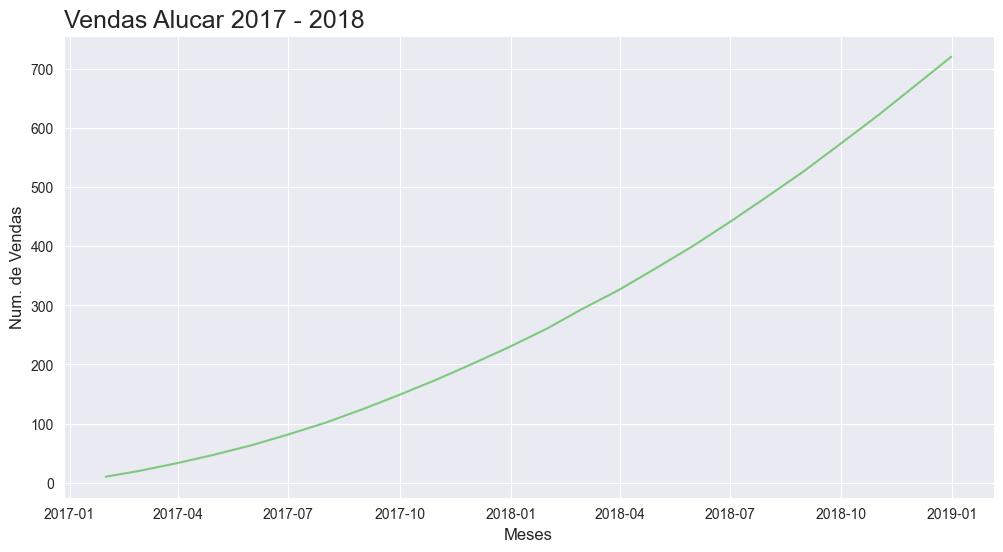

In [65]:
alucar_aumento.set_title('Vendas Alucar 2017 - 2018', loc='left', fontsize=18)
alucar_aumento.set_xlabel('Meses', fontsize = 12)
alucar_aumento.set_ylabel('Num. de Vendas', fontsize = 12)
alucar_aumento.figure

In [66]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [67]:
alucar['aumento'] = alucar['vendas'].diff()

In [68]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


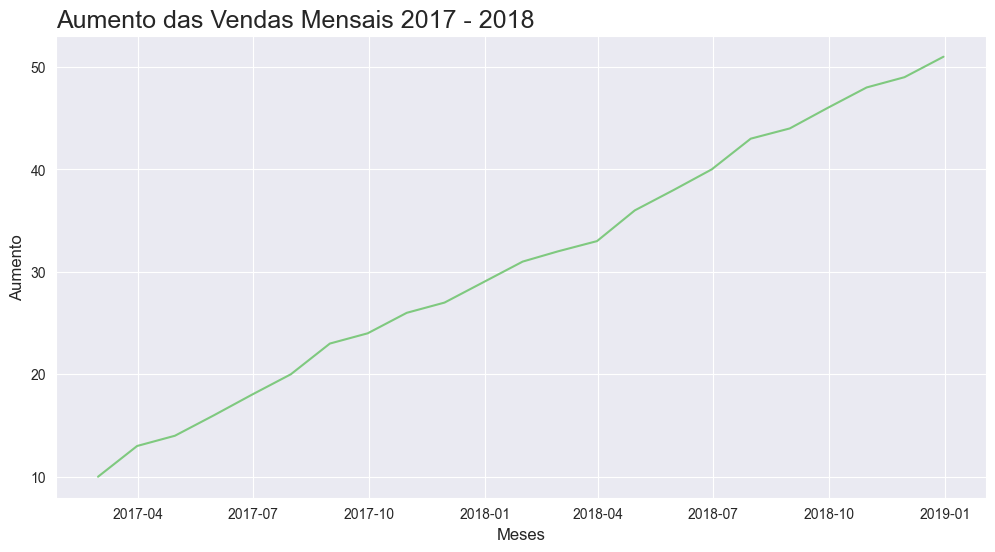

In [69]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
alucar_aumento = sns.lineplot(alucar, x='mes', y='aumento')
alucar_aumento.figure.set_size_inches(12,6)
alucar_aumento.set_title('Aumento das Vendas Mensais 2017 - 2018', loc='left', fontsize=18)
alucar_aumento.set_xlabel('Meses', fontsize = 12)
alucar_aumento.set_ylabel('Aumento', fontsize = 12)
alucar_aumento = alucar_aumento

In [70]:
def plotar(dataset, x, y, titulo, labelx, labely):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    graph = sns.lineplot(dataset, x=x, y=y)
    graph.figure.set_size_inches(12,6)
    graph.set_title(titulo, loc='left', fontsize=18)
    graph.set_xlabel(labelx, fontsize = 12)
    graph.set_ylabel(labely, fontsize = 12)

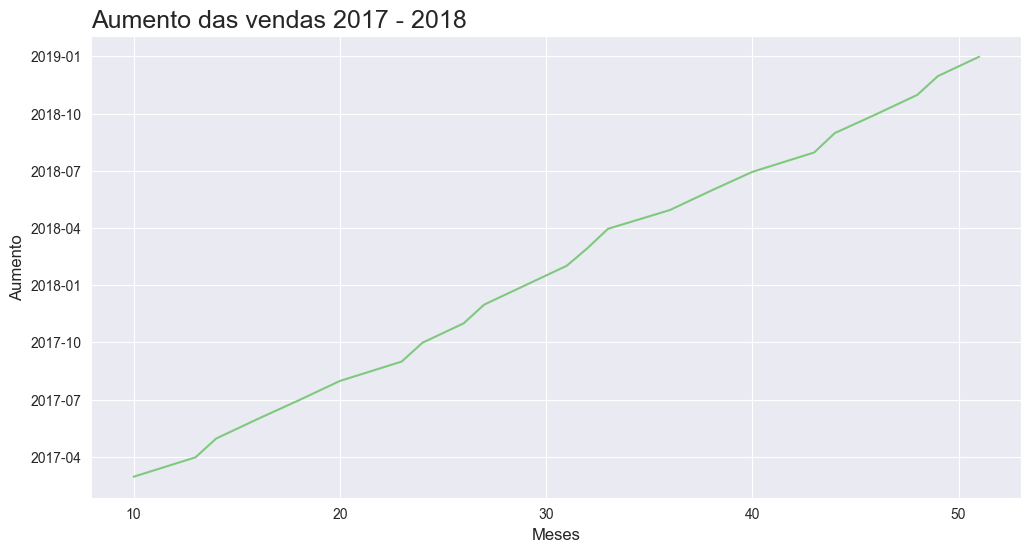

In [71]:
plotar(alucar,'aumento','mes','Aumento das vendas 2017 - 2018', 'Meses', 'Aumento')

In [72]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


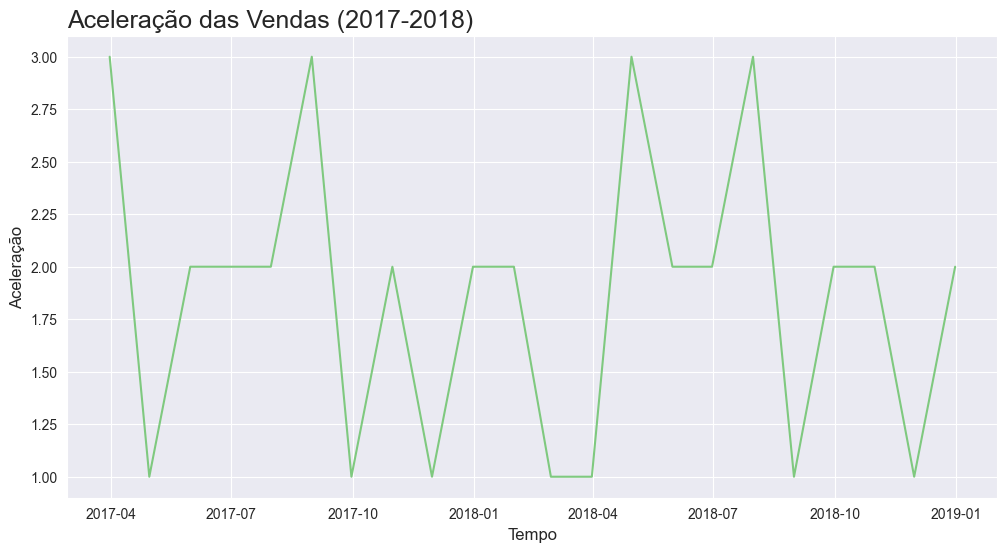

In [73]:
alucar_acel = plotar(alucar, 'mes', 'aceleracao', 'Aceleração das Vendas (2017-2018)', 'Tempo', 'Aceleração')

<AxesSubplot:title={'left':'Aceleração do Aumento de Vendas'}, xlabel='mes', ylabel='aceleracao'>

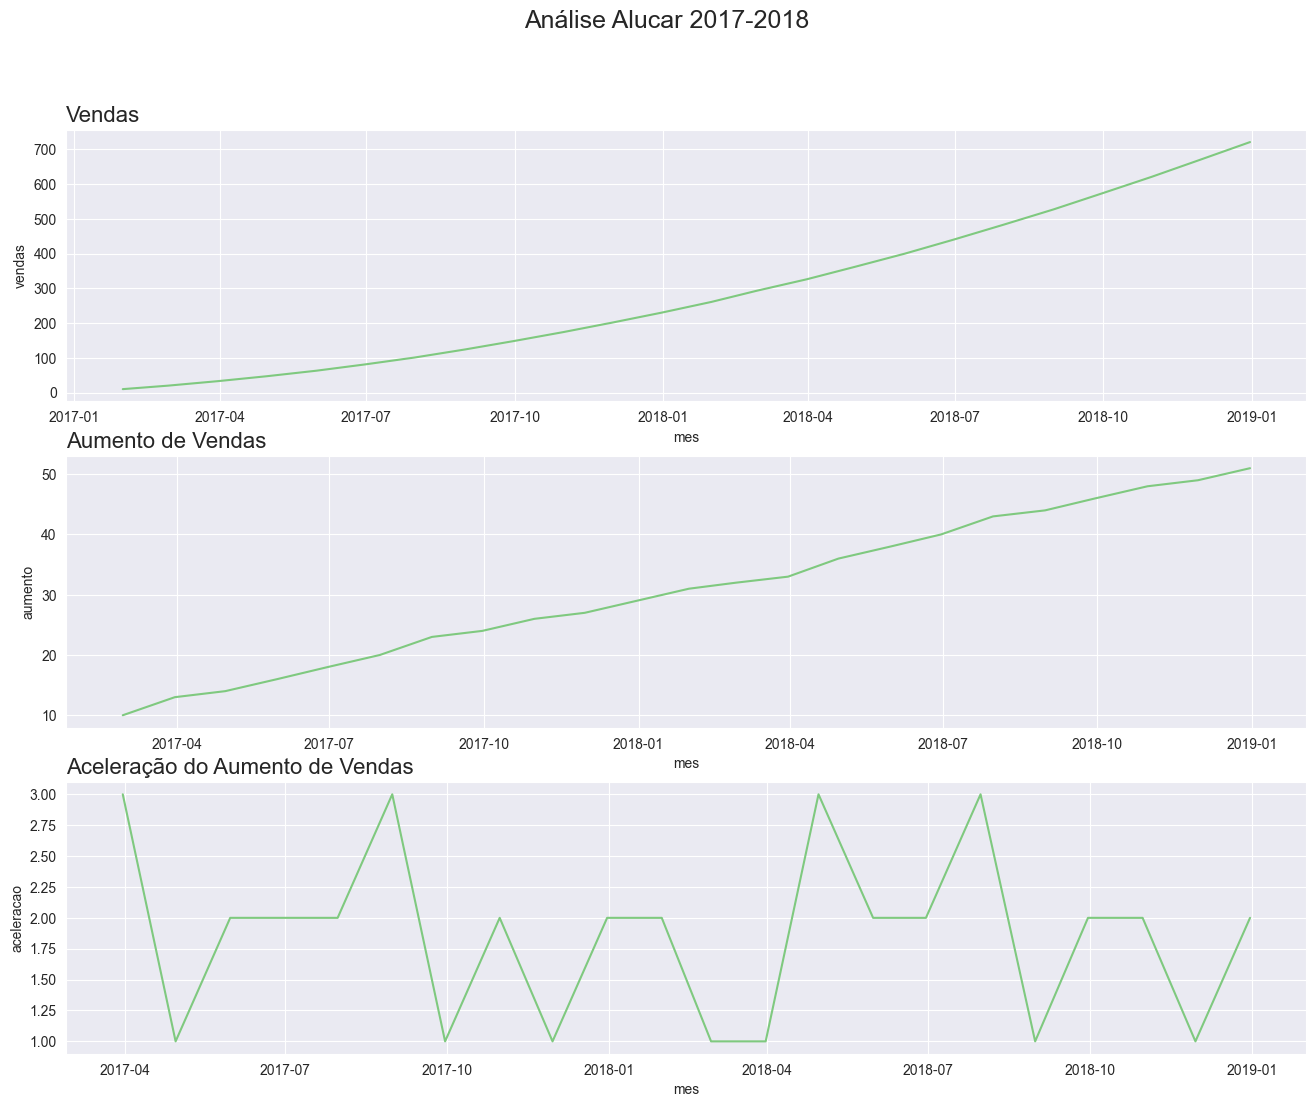

In [74]:
graficos = plt.figure(figsize=(16,12))
graficos.suptitle('Análise Alucar 2017-2018', fontsize = 18)
alucar_venda= plt.subplot(3,1,1)
alucar_venda.set_title('Vendas', fontsize = 16, loc='left')
sns.lineplot(alucar, x='mes', y='vendas')
alucar_aumento = plt.subplot(3,1,2)
alucar_aumento.set_title('Aumento de Vendas', fontsize = 16, loc='left')
sns.lineplot(alucar, x='mes', y='aumento')
alucar_aceleracao = plt.subplot(3,1,3)
alucar_aceleracao.set_title('Aceleração do Aumento de Vendas', fontsize = 16, loc='left')
sns.lineplot(alucar, x='mes', y='aceleracao')

In [75]:
def plot_comparacao(dataset, x, y1, y2, y3, titulo, subt1, subt2, subt3):
    graficos = plt.figure(figsize=(16,12))
    graficos.suptitle(titulo, fontsize = 18)
    alucar_venda= plt.subplot(3,1,1)
    alucar_venda.set_title(subt1, fontsize = 16, loc='left')
    sns.lineplot(data = dataset, x=x, y=y1)
    alucar_aumento = plt.subplot(3,1,2)
    alucar_aumento.set_title(subt2, fontsize = 16, loc='left')
    sns.lineplot(data = dataset, x=x, y=y2)
    alucar_aceleracao = plt.subplot(3,1,3)
    alucar_aceleracao.set_title(subt3, fontsize = 16, loc='left')
    sns.lineplot(data = dataset, x=x, y=y3)

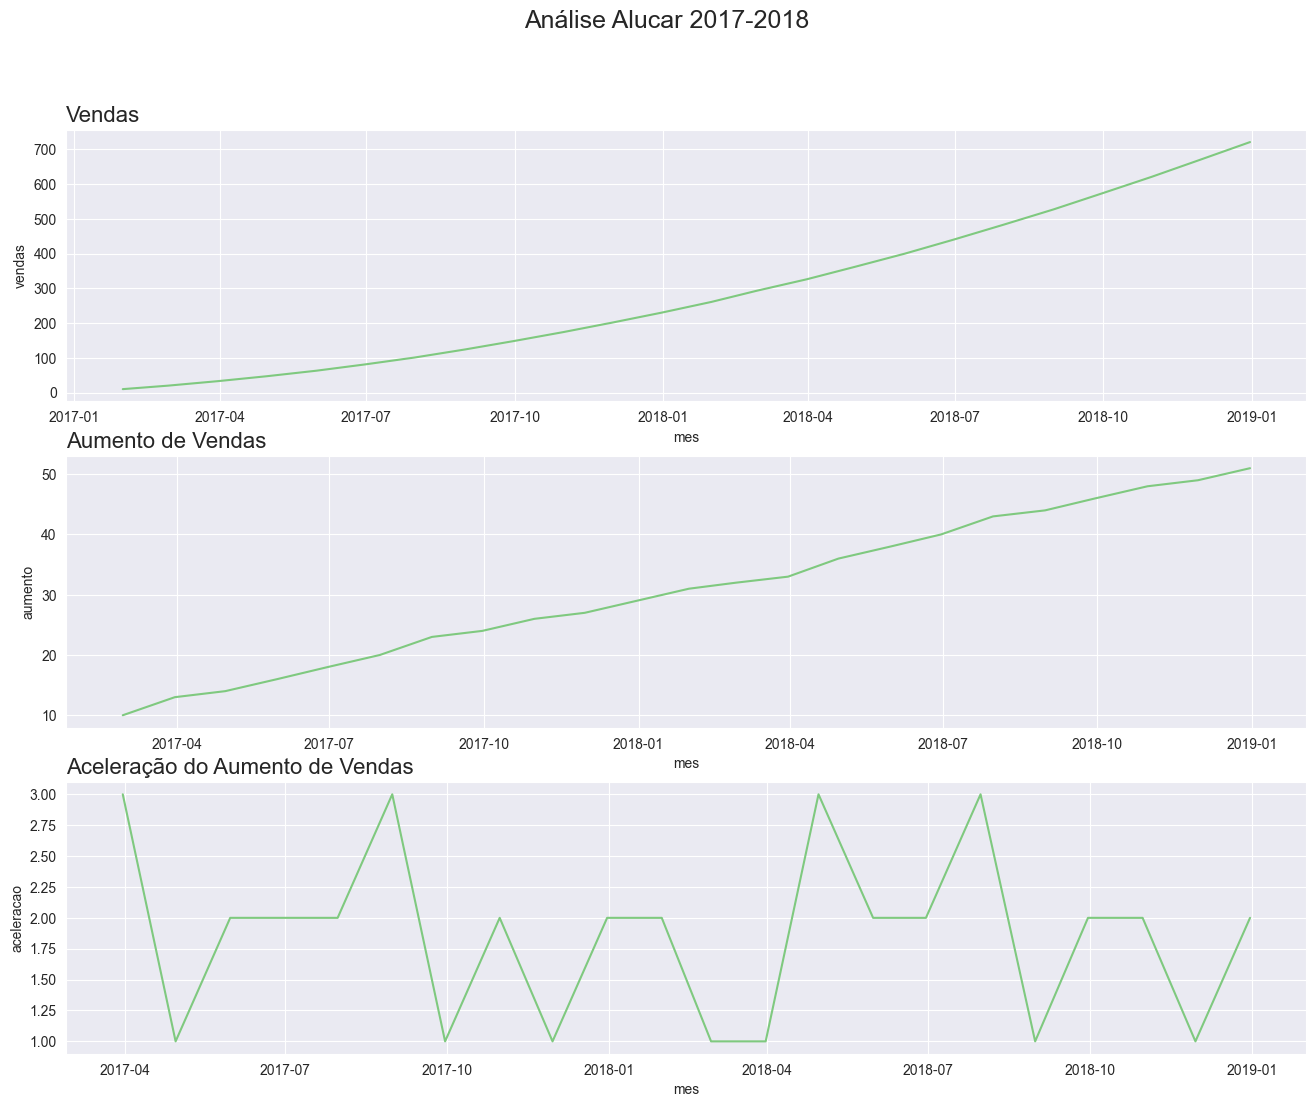

In [76]:
plot_comparacao(alucar, 'mes', 'vendas', 'aumento', 'aceleracao', 'Análise Alucar 2017-2018', 'Vendas', 'Aumento de Vendas', 'Aceleração do Aumento de Vendas')

In [77]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

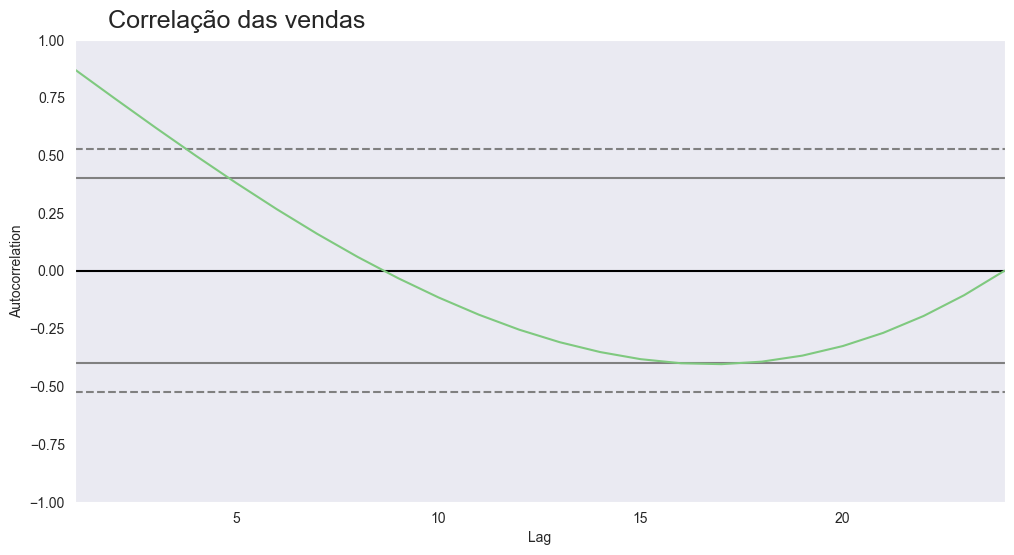

In [78]:
autocorrel = plt.figure(figsize=(12,6))
autocorrel.suptitle('Correlação das vendas', fontsize = 18, x=0.26, y=0.93)
autocorrelation_plot(alucar['vendas'])


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

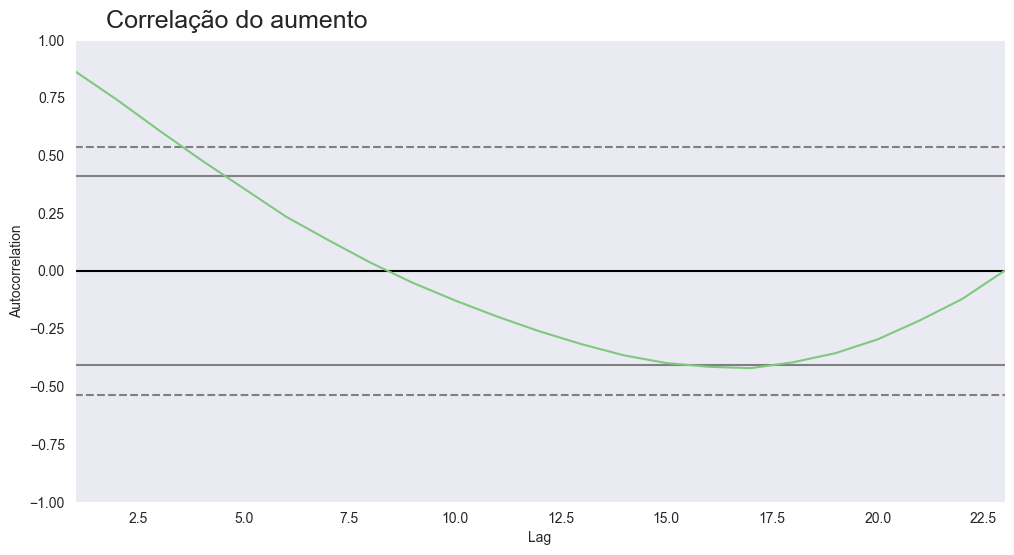

In [79]:
autocorrel = plt.figure(figsize=(12,6))
autocorrel.suptitle('Correlação do aumento', fontsize = 18, x=0.26, y=0.93)
autocorrelation_plot(alucar['aumento'][1:])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

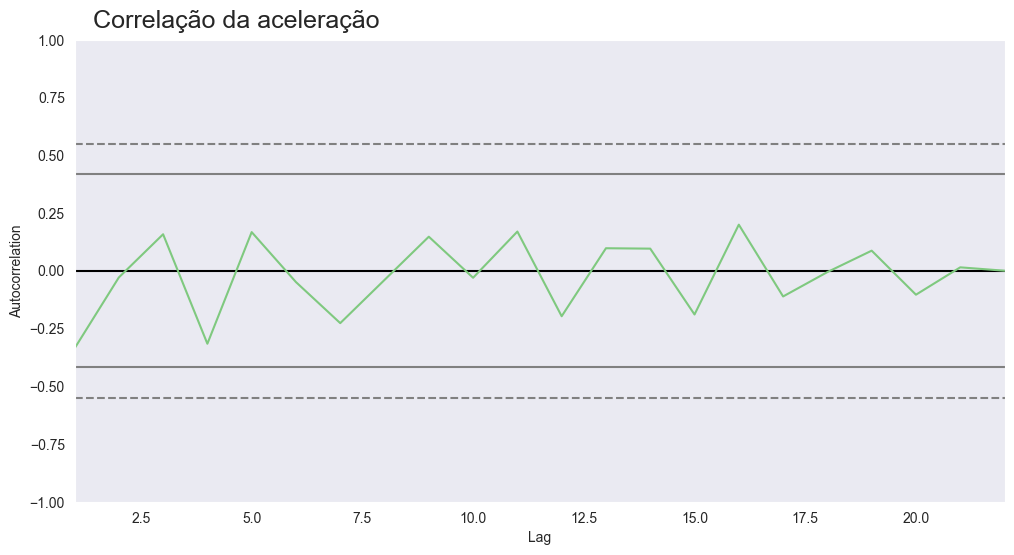

In [81]:
autocorrel = plt.figure(figsize=(12,6))
autocorrel.suptitle('Correlação da aceleração', fontsize = 18, x=0.26, y=0.93)
autocorrelation_plot(alucar['aceleracao'][2:])